<a href="https://colab.research.google.com/github/Piyush53r/Walmart-Sales-Prediction/blob/main/Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
train=pd.read_csv('train.csv')
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')

In [7]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [8]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,241338.0,12.755298,7.066384,1.000,7.0000,13.000000,19.000000,25.000000
Dept,241338.0,43.184438,29.728050,1.000,19.0000,36.000000,71.000000,99.000000
Weekly_Sales,241338.0,17602.840792,24483.998174,-1699.000,2817.9175,8612.850000,22120.662500,693099.360000
Temperature,241338.0,59.590440,18.486561,-2.060,46.2800,61.700000,73.740000,99.220000
Fuel_Price,241338.0,3.350550,0.456346,2.514,2.9190,3.433000,3.726000,4.468000
MarkDown1,86518.0,8192.854865,8637.503665,35.940,3225.2200,6069.600000,10073.640000,88646.760000
MarkDown2,68905.0,3728.374163,10599.016862,-265.760,43.0000,195.000000,2100.240000,104519.540000
MarkDown3,80452.0,1742.913890,10987.705503,0.000,6.0000,30.230000,115.180000,141630.610000
MarkDown4,85848.0,3539.283033,6405.956440,2.000,575.1300,1579.670000,3698.030000,57817.560000
MarkDown5,86518.0,4704.766956,4726.430373,135.160,2236.3100,3626.140000,5609.770000,58068.140000


In [9]:
from datetime import datetime as dt

In [10]:
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

,DateTimeObj
0,2010-02-05
1,2010-02-05
2,2010-02-05
3,2010-02-05
4,2010-02-05


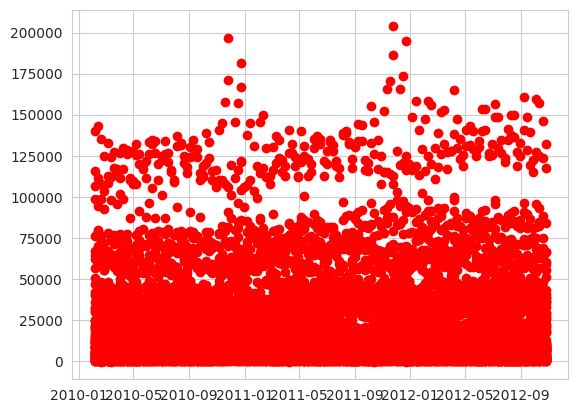

In [11]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()


In [12]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [13]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [14]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [15]:
walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]

In [17]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [18]:
walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()

In [19]:
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]

In [20]:
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [21]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


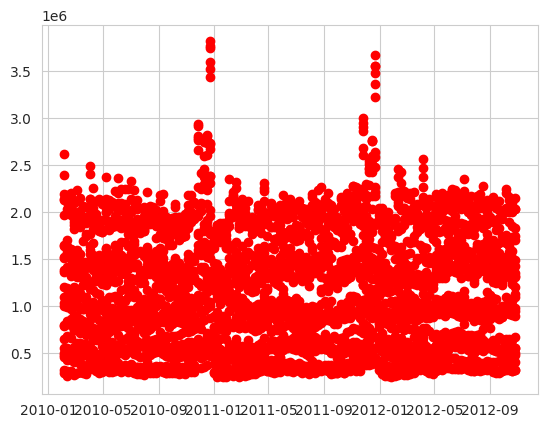

In [22]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [23]:
walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]

In [24]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [25]:
walmartstoredf.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [26]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)

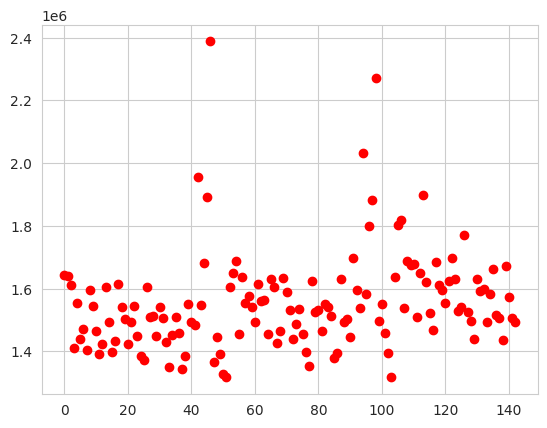

In [27]:
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [28]:
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [29]:
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [30]:
wmLinear = linear_model.LinearRegression()
wmLinear.fit(XTrain, YTrain)

LinearRegression()

In [31]:
wmLinear.coef_

array([  4231.2662823 , -95338.07560815,  -4842.29207362, -19459.81213996,
          486.40980057, 130397.89425663])

In [32]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

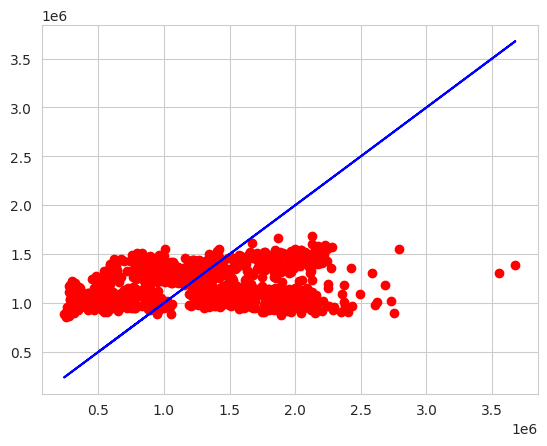

In [33]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [34]:
walmartstoredf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [35]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

In [36]:
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,...,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,...,False,False,False,False,False,False,False,False,False,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,...,False,False,False,False,False,False,False,False,False,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales

XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales

In [38]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,...,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25
2739,78.09,2.793,204.362566,7.527,22.0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
844,85.78,3.407,223.551618,5.668,129.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2605,63.36,2.837,132.756452,8.099,31.0,1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3247,28.49,3.523,136.753000,4.261,101.0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1729,44.42,2.948,126.289800,8.107,13.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Assuming XTrain and XTest are your features and YTrain and YTest are your targets
scaler = StandardScaler()
XTrain_scaled = scaler.fit_transform(XTrain)
XTest_scaled = scaler.transform(XTest)

wmLinear = linear_model.LinearRegression()
wmLinear.fit

wmLinear.fit(XTrain, YTrain)

LinearRegression()

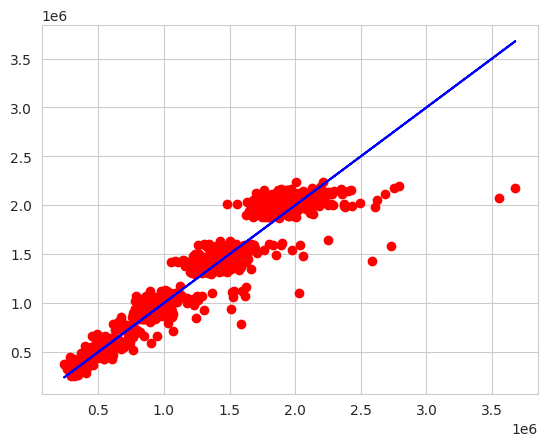

In [40]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()


In [41]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.09021536920201162 26889099516.837154


In [42]:
# Dimensionality Reduction

In [43]:
from sklearn.linear_model import Lasso

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
alphas = np.linspace(10, 20, 10)

In [46]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :

    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

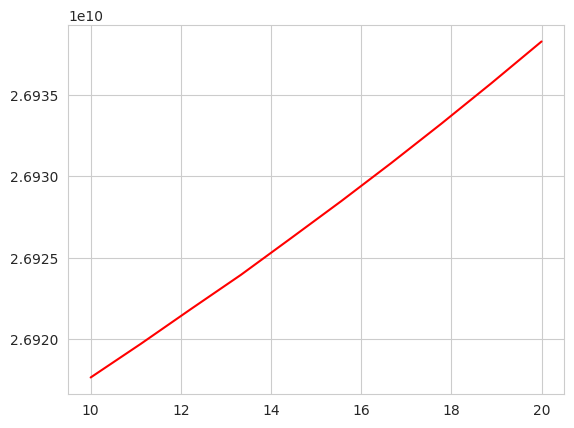

In [47]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [48]:
wmLinear = linear_model.LinearRegression()
wmLinear

LinearRegression()

In [49]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

Lasso(alpha=17)